In [116]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings("ignore", category=ConvergenceWarning)

## problem 1

In [86]:
df = pd.read_csv('bikeshare.csv')

### (a)

**Perform linear regression (OLS) of cnt (total count of rented bikes) against holiday (1 if holiday, 0 otherwise), temp (temperature in Celsius), hum (humidity), and windspeed (wind speed).**

In [87]:
X = df[['holiday', 'temp', 'hum', 'windspeed']]
y = df['cnt']

linear_regression = LinearRegression()
linear_regression.fit(X, y)

LinearRegression()

**What is wOLS?**

In [88]:
print("the resulting coeffients of the linear regression (w1):", linear_regression.coef_)
print("the resulting intercept of the linear regression (w0):", linear_regression.intercept_)

the resulting coeffients of the linear regression (w1): [ -613.59010464  6610.33898469 -3109.32970846 -4808.47559877]
the resulting intercept of the linear regression (w0): 4115.592496954672


**Are the coeﬀicients what you would expect?**

Yes
- holiday coeffient: -613.59010464
    - This indicates that bike rentals decrease on holidays.
    - As expected, there are fewer commuters on holidays.
- temp coeffient: 6610.33898469
    - This indicates that bike rentals increase as the temperature increases.
    - As expected, people are more likely to use bikes in warmer weather.
- hum coeffient: -3109.32970846
    - This indicates that bike rentals decrease as humidity increases.
    - As expected, high humidity makes biking uncomfortable.
- windspeed coeffient: -4808.47559877
    - This indicates that bike rentals decrease as wind speed increases.
    - As expected, strong winds make cycling challenging.

## problem 2

In [89]:
df = pd.read_csv('bc_data.csv')

### (a)

**Perform 5-fold CV to choose between logistic regression, LDA, and Naive Bayes.**

In [90]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

logistic_regression = LogisticRegression()
lda = LinearDiscriminantAnalysis()
naive_bayes = GaussianNB()

logistic_regression_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5)
lda_scores = cross_val_score(lda, X_train, y_train, cv=5)
naive_bayes_scores = cross_val_score(naive_bayes, X_train, y_train, cv=5)

**Provide a table with the accuracy of each classifier on each fold of the data (measured in terms of proportion of correct predictions).**

In [91]:
results = pd.DataFrame({
    'Fold 1': [logistic_regression_scores[0], lda_scores[0], naive_bayes_scores[0]],
    'Fold 2': [logistic_regression_scores[1], lda_scores[1], naive_bayes_scores[1]],
    'Fold 3': [logistic_regression_scores[2], lda_scores[2], naive_bayes_scores[2]],
    'Fold 4': [logistic_regression_scores[3], lda_scores[3], naive_bayes_scores[3]],
    'Fold 5': [logistic_regression_scores[4], lda_scores[4], naive_bayes_scores[4]]
}, index=['Logistic Regression', 'LDA', 'Naive Bayes'])

results

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Logistic Regression,0.949367,0.949367,0.923077,0.948718,0.935897
LDA,0.949367,0.936709,0.923077,0.961538,0.935897
Naive Bayes,0.962025,0.924051,0.923077,0.948718,0.897436


**Which classifier should you select?**

In [92]:
print("logistic regression accuracy: %0.5f" % (logistic_regression_scores.mean()))
print("LDA accuracy: %0.5f" % (lda_scores.mean()))
print("Naive Bayes accuracy: %0.5f" % (naive_bayes_scores.mean()))

logistic regression accuracy: 0.94129
LDA accuracy: 0.94132
Naive Bayes accuracy: 0.93106


Since the 5-fold cross-validation results showed that LDA had the highest average accuracy, LDA should be chosen.

### (b)

**We now turn to visualizing the data. Using only features 21 and 28 (i.e., 22 and 29-th columns), plot the data in R2, using markers o/+ for the categories 0/1.**

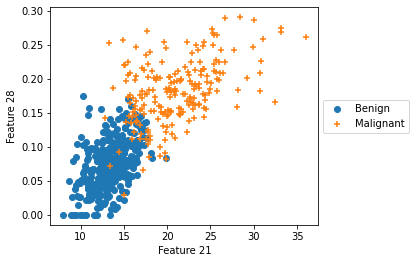

In [93]:
X = df.iloc[:, [22, 29]]  
y = df.iloc[:, 1]        

fig, ax = plt.subplots()

ax.scatter(X[y == 0].iloc[:, 0], X[y == 0].iloc[:, 1], marker='o', label='Benign')
ax.scatter(X[y == 1].iloc[:, 0], X[y == 1].iloc[:, 1], marker='+', label='Malignant')

ax.set_xlabel('Feature 21')
ax.set_ylabel('Feature 28')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

**Perform logistic regression and LDA classification by regressing the diagnosis only on these two features, and plot the line corresponding to the decision boundary in each case.**

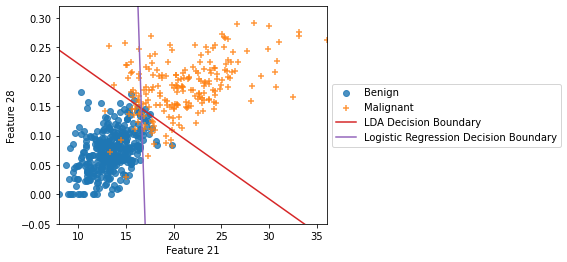

In [94]:
logistic_regression = LogisticRegression()
lda = LinearDiscriminantAnalysis()

logistic_regression = logistic_regression.fit(X, y)
lda = lda.fit(X, y)

x_range = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 200)

lda_coef_21 = lda.coef_[0, 0]
lda_coef_28 = lda.coef_[0, 1]
lda_intercept = lda.intercept_[0]
lda_boundary = (-lda_intercept - lda_coef_21 * x_range) / lda_coef_28

logistic_regression_coef_21 = logistic_regression.coef_[0, 0]
logistic_regression_coef_28 = logistic_regression.coef_[0, 1]
logistic_regression_intercept = logistic_regression.intercept_[0]

logistic_regression_boundary = (-logistic_regression_intercept - logistic_regression_coef_21 * x_range) / logistic_regression_coef_28

fig, ax = plt.subplots()

ax.scatter(X[y == 0].iloc[:, 0], X[y == 0].iloc[:, 1], marker='o', label='Benign', alpha=0.8)
ax.scatter(X[y == 1].iloc[:, 0], X[y == 1].iloc[:, 1], marker='+', label='Malignant', alpha=0.8)

ax.plot(x_range, lda_boundary, '-', color='C3', label='LDA Decision Boundary')
ax.plot(x_range, logistic_regression_boundary, '-', color='C4', label='Logistic Regression Decision Boundary')

ax.set_xlabel('Feature 21')
ax.set_ylabel('Feature 28')
ax.set_xlim(X.iloc[:, 0].min(), X.iloc[:, 0].max())
ax.set_ylim(-0.05, 0.32)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


## problem 3

In [95]:
df = pd.read_csv('bc_data.csv')

X_train = df.iloc[:400, 2:]  
y_train = df.iloc[:400, 1]  

X_test = df.iloc[400:, 2:]   
y_test = df.iloc[400:, 1]  

### (a)

**Train a decision tree (with default settings) on the training data. Report the fraction of test points that are classified correctly using the decision tree.**

In [96]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

print(f"Decision Tree test set accuracy: {accuracy_score(y_test, decision_tree.predict(X_test)):.4f}")

Decision Tree test set accuracy: 0.9437


### (b)

**Visualize the trained decision tree.**

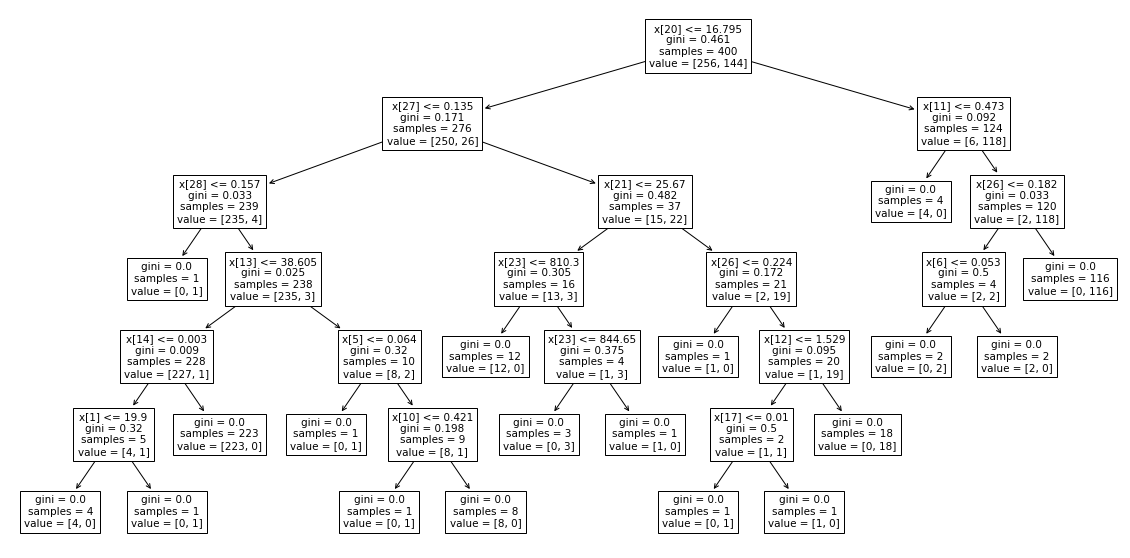

In [97]:
plt.figure(figsize=(20,10))
plt.show(tree.plot_tree(decision_tree))

**Suppose we consider a feature to be “important” if it appears in one of the splits in the top three layers of the decision tree. Which features are considered to be important, according to the trained tree?**

In [98]:
important_indices = [20, 27, 11, 29, 21, 26]
important_features = [X_train.columns[i] for i in important_indices]

print("Decision Tree important features:", important_features)

Decision Tree important features: ['radius_worst', 'points_worst', 'texture_se', 'dimension_worst', 'texture_worst', 'concavity_worst']


### (c)

**Now use bagging: Create an ensemble of 100 decision trees, where each tree is trained on a bootstrapped sample of 300 data points (randomly sampled, with replacement, from the training data set). The prediction for a test point is computed using a majority vote among the 100 trained trees. Report the fraction of test points that are classified correctly using the ensemble, and compare it to (a).**

In [99]:
bagging_classifier = BaggingClassifier(n_estimators=100, max_samples=300)
bagging_classifier.fit(X_train, y_train)

print(f"Bagging Clasifier test set accuracy: {accuracy_score(y_test, bagging_classifier.predict(X_test)):.4f}")

Bagging Clasifier test set accuracy: 0.9563


When comparing the results, the test set accuracy of the Bagging Classifier is greater than that of the Decision Tree.

### (d)

**Use the same criterion as in (b) to determine which features are important for each of the 100 trees in the ensemble.** 

In [100]:
features = X_train.columns.tolist()
features_count = {feature: 0 for feature in features}

for tree in bagging_classifier.estimators_:
    tree_structure = tree.tree_
    nodes = tree_structure.node_count
    for node in range(min(7, nodes)): # check until nodes in top three layers
        if tree_structure.feature[node] != -2: # if not leaf node
            feature = features[tree_structure.feature[node]]
            features_count[feature] += 1

**What are the 5 most important features overall, ranked according to the number of times they appear as important features among the 100 trees in the ensemble?**

In [101]:
important_features = dict(sorted(features_count.items(), key=lambda x: x[1], reverse=True)[:5])
print("Bagging Classifier important features:", important_features)

Bagging Classifier important features: {'points_worst': 96, 'area_se': 51, 'perimeter_worst': 47, 'area_worst': 39, 'radius_se': 29}


### (e)

**Instead of bagging, by using random forest, repeat the problems (c) and (d).**

In [102]:
random_foreset = RandomForestClassifier(n_estimators=100, max_samples=300)
random_foreset.fit(X_train, y_train)

print(f"Random Forest test set accuracy: {accuracy_score(y_test, random_foreset.predict(X_test)):.4f}")

Random Forest test set accuracy: 0.9625


When comparing the results, the test set accuracy of the Random Forest is greater than that of the Decision Tree.

In [103]:
features = X_train.columns.tolist()
features_count = {feature: 0 for feature in features}

for tree in random_foreset.estimators_:
    tree_structure = tree.tree_
    nodes = tree_structure.node_count
    for node in range(min(7, nodes)): # check until nodes in top 3 layers
        if tree_structure.feature[node] != -2: # if not leaf node
            feature = features[tree_structure.feature[node]]
            features_count[feature] += 1

important_features = dict(sorted(features_count.items(), key=lambda x: x[1], reverse=True)[:5])
print("Random Forest important features:", important_features)

Random Forest important features: {'points_worst': 54, 'area_worst': 38, 'perimeter_worst': 36, 'radius_worst': 35, 'points_mean': 31}


**After obtaining the 5 most important features, compare those features with the top 5 features resulting from the ‘feature importance’ attribute of the classifier**

In [104]:
features = X_train.columns.tolist()
importance = random_foreset.feature_importances_

features_importance = dict(zip(features, importance))
print("Random Forest feature importance:", dict(sorted(features_importance.items(), key=lambda x: x[1], reverse=True)[:5]))

Random Forest feature importance: {'points_worst': 0.14013276186962248, 'perimeter_worst': 0.11297035826021767, 'area_worst': 0.10687254992981493, 'radius_worst': 0.09023649317214325, 'points_mean': 0.08911604990876103}


top 5 most important features appeared in top three layers: 'points_worst', 'area_worst', 'perimeter_worst', 'radius_worst', 'points_mean'

top 5 most important features from feature importance attribute: 'points_worst', 'perimeter_worst', 'area_worst', 'radius_worst', 'points_mean'

The same five features were selected, although the order of importance differs.

## Problem 4

In [105]:
df = pd.read_csv('CommonBank.csv')

### (a)

**First, exclude ID and ZIP.code from the features. Use StandardScaler to perform normalization to standardize the scale of all features. Split the first 4,000 records as the training set and the remaining 1,000 records as the test set.**

In [106]:
features = df.drop(['ID', 'ZIP Code'], axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

X = features.drop('PersonalLoan', axis=1)
y = features['PersonalLoan']

X_train = X[:4000]
y_train = y[:4000]

X_test = X[4000:]
y_test = y[4000:]

**Compare the distribution of the target variable between the training and test sets to ensure they are similar.**

y_train distribution:
PersonalLoan
0    0.90075
1    0.09925
Name: proportion, dtype: float64

y_test distribution:
PersonalLoan
0    0.917
1    0.083
Name: proportion, dtype: float64


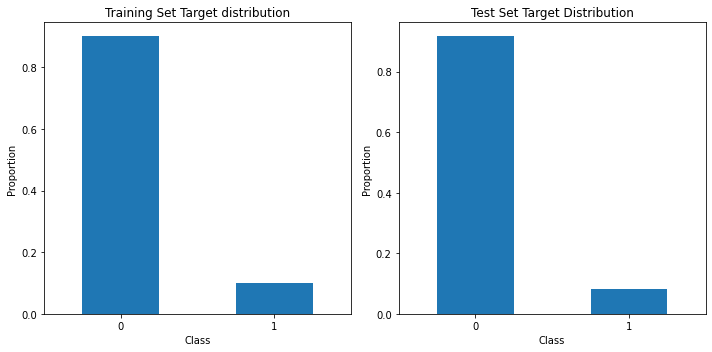

In [107]:
y_train_distribution = y_train.value_counts(normalize=True)
y_test_distribution = y_test.value_counts(normalize=True)

print("y_train distribution:")
print(y_train_distribution)
print("\ny_test distribution:")
print(y_test_distribution)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
y_train_distribution.plot(kind='bar')
plt.title('Training Set Target distribution')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
y_test_distribution.plot(kind='bar')
plt.title('Test Set Target Distribution')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

The distributions of the two can be considered almost identical.

### (b)

**Apply 5-NN and analyze the results.**

In [108]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"KNN test set accuracy: {accuracy_score(y_test, y_pred):.4f}")

KNN test set accuracy: 0.9100


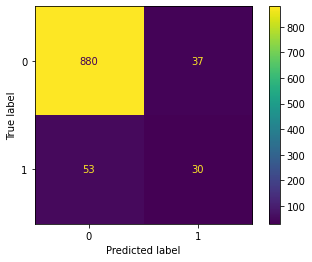

In [109]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

Predicting all data as 0 still achieves an accuracy of 91.7%. Therefore, an accuracy of 91%, which is similar to 91.7%, cannot be considered high.

### (c)

**Use the last 800 records of the training set as a validation set. Apply k-NN with various values of k and compare prediction performance. Which value of k provides the best model performance?**

In [110]:
X_train = X[:3200]
y_train = y[:3200]

X_val = X[3200:4000]
y_val = y[3200:4000]

results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_val, knn.predict(X_val))
    })

results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1   0.90750
1    2   0.91750
2    3   0.90375
3    4   0.91375
4    5   0.91250
5    6   0.91000
6    7   0.90500
7    8   0.90750
8    9   0.90500
9   10   0.90500
10  11   0.90375
11  12   0.90500
12  13   0.90375
13  14   0.90375


When k=2, the highest accuracy on the validation data is achieved.

In [111]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)
print(f"knn test set accuracy: {accuracy_score(y_test, knn.predict(X_test)):.4f}")

knn test set accuracy: 0.9160


### (d)

**Perform 5-fold cross-validation on the training set, repeated five times, to find the best k value. Use this best k value to create the final model and apply it to the test set. Report the model’s performance.**

In [117]:
X_train = X[:4000]
y_train = y[:4000]

rkf = RepeatedKFold(n_splits=5, n_repeats=5)
cv_scores = {}
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=rkf)
    cv_scores[k] = scores.mean()

best_k = max(cv_scores.items(), key=lambda x: x[1])[0]

final_model = KNeighborsClassifier(n_neighbors=best_k)

final_model.fit(X_train, y_train)
print(f"final model test set accuracy: {accuracy_score(y_test, final_model.predict(X_test)):.4f}")

final model test set accuracy: 0.9100


### (e)

**Compare the advantages and disadvantages of the training methods used in steps 3 and 4.**

In (c), Train/Val Split was used,

Advantages
- straightforward and easy to implement
- computationally efficient
- works well with a limited computational resources

Disadvantages
- performance evaluation depends on the data split
- reduces model generalizability especially in small datasets

In (d), Repeated k-Fold Cross-Validation was used,

Advantages
- more robust performance estimate
- maximize the dataset’s utility
- reliable evaluation even with small datasets
- less prone to overfitting

Disadvantages
- longer training time
- increases computational cost
- not exactly reflect the behavior of a single deployed model